In [3]:
import os
import tarfile

In [4]:
# FETCH HOUSING PRIZE DATA
HOUSING_PATH = 'dataset/housing'

def get_file(filename='', source='', destination=''):
    for path, dirname, file in os.walk('..\{}'.format(source)):
        if filename in path:
            location = os.path.join(path, file[0])
            return location
            
            
housing_file = get_file(filename='housing', source='handson-ml', 
         destination='.\{}'.format(HOUSING_PATH))

In [5]:
# LOAD HOUSING PRIZE DATA
import pandas as pd
import numpy as np

housing = pd.read_csv(housing_file)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
# GET DATA SET SUMMARY
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [7]:
# CHECK FOR MISSING VALUES
housing.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
# CHECK DATA TYPES
housing.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

* `ocean_proximity` is non-numeric

In [9]:
# COUNT UNIQUE VALUES IN OCEAN_PROXIMITY
housing['ocean_proximity'].value_counts().to_frame()

,ocean_proximity
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


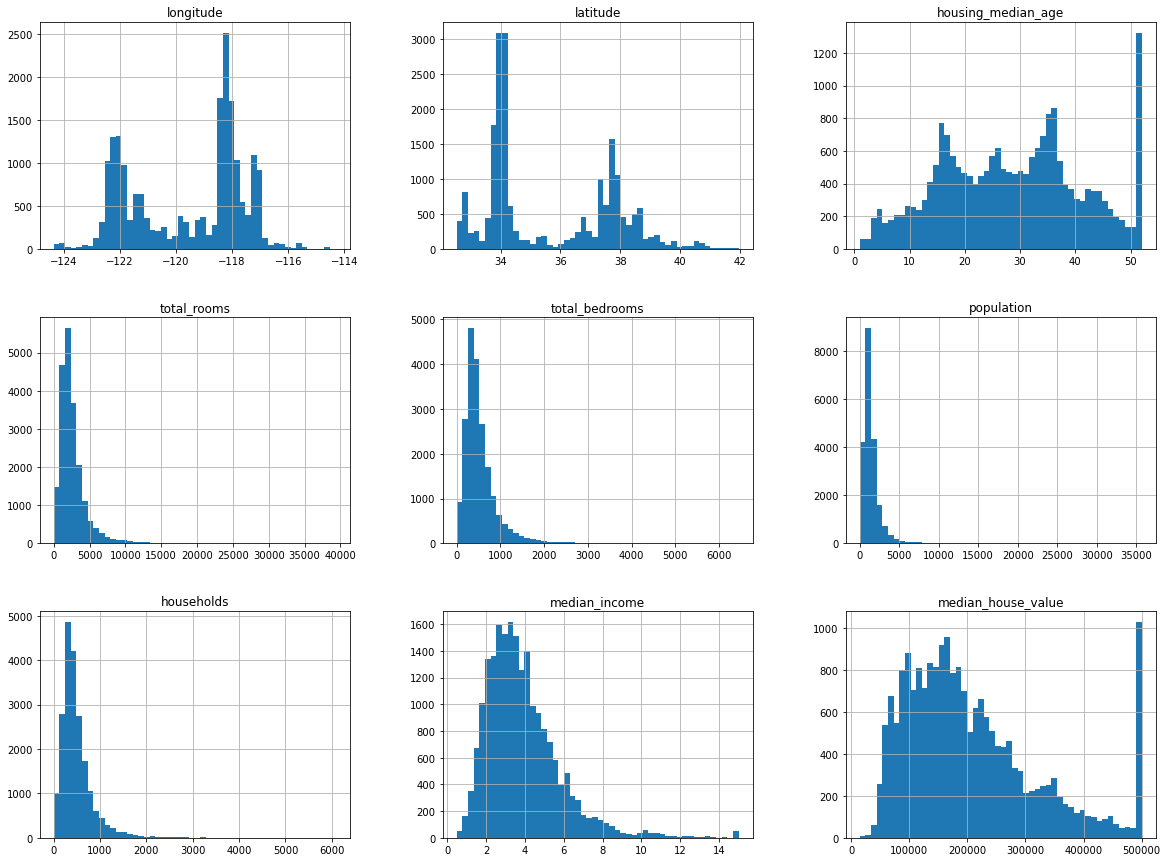

In [10]:
# VISUALIZE NUMERIC ATTRIBUTES
%matplotlib inline

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

In [11]:
# SET ASIDE TEST AND TRAINING SET
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [12]:
train_test_split?

In [13]:
# CREATE INCOME CATEGORY FOR STRAT SPLIT
housing['income_cat'] = np.ceil(housing['median_income'] / 1.5)
housing['income_cat'].where(housing['income_cat'] < 5, 5.0, inplace=True)

<AxesSubplot:>

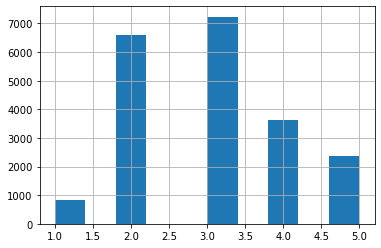

In [14]:
housing['income_cat'].hist()

In [15]:
# PERFORM STRATIFIED SHUFFLE ON DATA
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
# FRACTION OF EACH INCOME CATEGORY IN THE INITIAL HOUSING DATA
initial_fraction = housing['income_cat'].value_counts()/len(housing)

In [17]:
# DROP INCOME_CAT FIELD
strat_train_fraction = strat_train_set['income_cat'].value_counts()/len(strat_train_set)
strat_test_fraction = strat_test_set['income_cat'].value_counts()/len(strat_test_set)


to_join = [strat_train_fraction, strat_test_fraction]
strat_summary = pd.DataFrame({
    'Overall': initial_fraction,
    'Stratified_test': strat_test_fraction,
    'Stratified_train': strat_train_fraction             
}).sort_index()

strat_summary

,Overall,Stratified_test,Stratified_train
1.0,0.039826,0.039729,0.039850
2.0,0.318847,0.318798,0.318859
3.0,0.350581,0.350533,0.350594
4.0,0.176308,0.176357,0.176296
5.0,0.114438,0.114583,0.114402


* Similar Fractions in all categories indicates Stratified sampling's low sampling bias 

#### Visualizing and Gaining Insight

In [18]:
housing = strat_train_set.copy()
housing.drop('income_cat', inplace=True, axis=1)  # REMOVE THE INCOME_CAT FEATURE

In [19]:
print(max(housing.population / 100),
min(housing.population / 100))

356.82 0.03


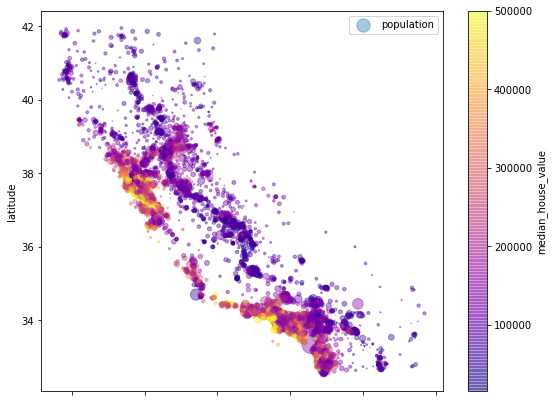

In [20]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s=housing['population']/100, c='median_house_value',
            label='population', cmap=plt.get_cmap('plasma'), colorbar=True,
            figsize=(9, 7))

plt.legend()

In [21]:
# LOOKING FOR CORELATION
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False).to_frame()

,median_house_value
median_house_value,1.000000
median_income,0.687160
total_rooms,0.135097
housing_median_age,0.114110
households,0.064506
total_bedrooms,0.047689
population,-0.026920
longitude,-0.047432
latitude,-0.142724


<AxesSubplot:>

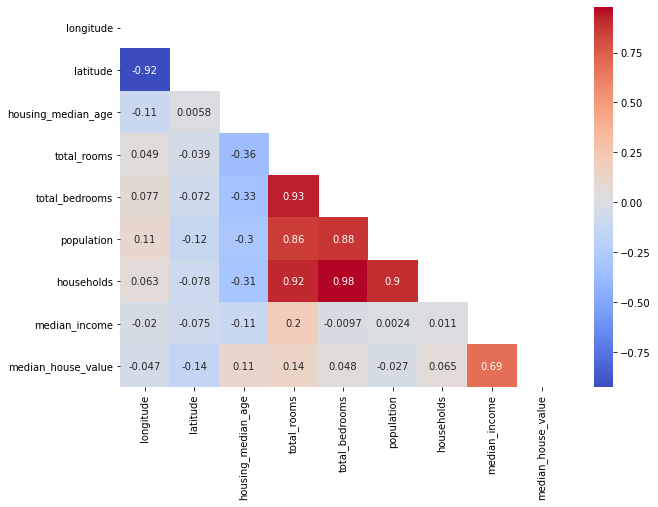

In [22]:
import seaborn as sns
tri_corr = np.triu(housing.corr())
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, mask=tri_corr)

###  Experimenting Attributes Combination

<p> Create new features by merging existing features

In [23]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [24]:
housing.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

<h3> Training Preparation

In [25]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

In [26]:
housing = housing.drop('income_cat', axis=1)

* Data Cleaning Process
<p> An essential process before feeding data to machine learning models

In [27]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [28]:
# IMPUTE THE MISSING VALUES WITH A GOOD STRATEGY
from sklearn.impute import SimpleImputer

In [29]:
# EXCLUDE NON-NUMERIC ATTR
housing_num = housing.drop('ocean_proximity', axis=1)

impute = SimpleImputer(strategy='mean')
X = impute.fit_transform(housing_num)

# BACK TO A DATAFRAME
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

In [30]:
housing_tr.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

<h3> Handling Text Categorical Data </h3>
<p> Text data needs to be converted to numeric data for machine learning injestion

In [31]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

try_encode = OneHotEncoder(sparse=False)
try_encode.fit_transform(housing['ocean_proximity'].values.reshape(-1, 1))

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [32]:
try_encode.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [33]:
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

In [34]:
housing_cat_encoded.shape 
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [35]:
one_h_encode = OneHotEncoder()
one_h_encode.fit_transform(housing_cat_encoded.reshape(-1, 1))

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

#### Create Custom Transformer for combining attributes of the data 
* `bedroom_per_room`
* `rooms_per_household`
* `population_per_household`
   

In [36]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    ''' Perform combination of some designated column in Dataset'''
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedroom_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        

attr_adder = CombinedAttributesAdder()
housing_extra_attr = attr_adder.fit_transform(housing.values)



In [37]:

class DataFrameSelector(BaseEstimator, TransformerMixin):
    
    '''Extract values of specified columns'''
    def __init__(self, col):
        self.col = col
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.col].values


#### Create a Pipeline to Encapsulate entire data prepatation steps
* `Numeric Attributes`
* `Non-Numeric Attributes`


In [38]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler

In [39]:
housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        158
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [40]:
num_attr = list(housing_num)
cat_attr = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attr)),
    ('impute', SimpleImputer(strategy='mean')),
    ('combine', CombinedAttributesAdder()),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attr)),
    ('endcode', OneHotEncoder(sparse=False))
])

combine_transformation = FeatureUnion(transformer_list=[
    ('numeric_transformation', num_pipeline),
    ('categorical_transformation', cat_pipeline)
], verbose=True)


In [41]:
housing_prepared = combine_transformation.fit_transform(housing)

[FeatureUnion]  (step 1 of 2) Processing numeric_transformation, total=   0.0s
[FeatureUnion]  (step 2 of 2) Processing categorical_transformation, total=   0.0s


#### Training a Model to Fit the data
* Linear Model
* Decision Tree
* Probabilistic Model

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
lin_model = LinearRegression()
lin_model.fit(housing_prepared, housing_labels)

LinearRegression()

In [44]:
lin_model.coef_

array([-55645.98566264, -56820.80897747,  13720.38285173,  -4702.9413456 ,
        10173.9180045 , -45535.38022449,  45159.77518477,  73897.4931079 ,
         6362.30829578,   1065.56146795,   7161.5964515 , -18112.45972402,
       -55939.85071828, 111365.16644656, -22524.64740512, -14788.20859914])

In [45]:
lin_model.score(housing_prepared, housing_labels)

0.647142323313108

In [46]:
some_data = housing_prepared[:5]
some_labels = housing_labels.iloc[:5]

print('Prediction: \t{}'.format(np.round(lin_model.predict(some_data), 2)))
print('Actual: \t', some_labels.values)

# dir(lin_model.predict(some_data))

Prediction: 	[210944.   318525.57 210996.33  60049.49 191123.84]
Actual: 	 [286600. 340600. 196900.  46300. 254500.]


#### LinearRegression Evaluation

In [47]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_model.predict(housing_prepared)
error = mean_squared_error(housing_prediction, housing_labels)
error_square = np.sqrt(error)
print('Mean Squared Error of Predicted Values: ', round(error_square, 2))

Mean Squared Error of Predicted Values:  68727.62


In [48]:
# FIND ACTUAL VALUE STANDARD DEVIATION
print('Standard Deviation of Target Value is: ', np.round(np.std(housing_labels), 2))

Standard Deviation of Target Value is:  115699.51


* This indicates the model does well above predicting just the mean throughout (MSE $\lt$ STD)

<AxesSubplot:>

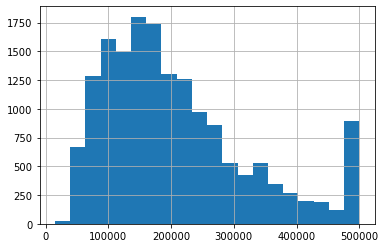

In [49]:
# VISUALIZE DISTRIBUTION OF TARGET VALUES
housing_labels.hist(bins=20)

* Target Values are Distributed Normally

Better Performance could be achieved with a more robust algorithm than `LinearRegression`. We'd consider the following algorithms next-up
* DecisionTreeRegressor
* RandomForest (Ensemble Algorithm)
* SupportVectorMachines

In [50]:
# DECISION TREE
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor()
tree.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [51]:
tree_prediction = tree.predict(housing_prepared)
tree_score = mean_squared_error(tree_prediction, housing_labels)
tree_score

0.0

* Use Cross Validation technique to validate this overrated result

In [52]:
from sklearn.model_selection import cross_val_score

val_score = cross_val_score(tree, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_score = np.sqrt(-val_score)

def ScoreSummary(score):
    print('Scores: ', np.round(score, 2), '\n')
    print('Mean: ', np.round(np.mean(score), 2))
    print('Std: ', np.round(np.std(score), 2))

In [53]:
ScoreSummary(rmse_score)

Scores:  [70055.63 67937.9  71820.09 69879.73 70704.89 74403.52 72063.92 71982.98
 77070.23 69096.4 ] 

Mean:  71501.53
Std:  2528.26


* Poor cross validation results indicating model is overfitting
<p> We cross validate the previous LinearRegression model and compare performance </p>

In [54]:
val_score_lin = cross_val_score(lin_model, housing_prepared, housing_labels, scoring='neg_mean_squared_error', cv=10)
rmse_score_lin = np.sqrt(-val_score_lin)

In [55]:
ScoreSummary(rmse_score_lin)

Scores:  [66991.93 67048.68 70444.06 74774.02 68102.64 71319.01 65085.1  68353.36
 71773.08 67789.05] 

Mean:  69168.09
Std:  2721.51


* `LinearRegression` model performs even better than the `DecisionTreeRegressor`(without tunning)

In [105]:
# RANDOM FOREST REGRESSOR
from sklearn.ensemble import RandomForestRegressor

ensemble_tree = RandomForestRegressor()
ensemble_tree.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [106]:
# Validate
pred = ensemble_tree.predict(housing_prepared)
dtree_rmse = np.sqrt(mean_squared_error(pred, housing_labels))
dtree_rmse

18744.236174689006

In [107]:
# Cross validate
cross_val_ensemble = cross_val_score(ensemble_tree, housing_prepared, housing_labels,
                                     scoring='neg_mean_squared_error', cv=5)
rmse_ensemble = np.sqrt(-cross_val_ensemble)
ScoreSummary(rmse_ensemble)

Scores:  [49127.37 50981.27 51654.   48393.76 51830.1 ] 

Mean:  50397.3
Std:  1385.65


Performs better than all other algorithms, with the following observations
* Validate score is weigh lower than cross-validate score, which suggests model is overfitting training data
* The model can perform better on hyperparameter tuning.


#### Grid Search for Hyperparameter tuning 
search a grid of hypermeters to find the best fit

In [59]:
from sklearn.model_selection import GridSearchCV

In [125]:
param_grid = [
    {'n_estimators':[3, 13, 30, 40], 'max_features':[2, 4, 6, 8]}
]

In [126]:
search = GridSearchCV(ensemble_tree, param_grid, scoring='neg_mean_squared_error', 
                      cv=5, verbose=1, n_jobs=-1)

search.fit(housing_prepared, housing_labels)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   30.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:  1.0min finished


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 13, 30, 40]}],
             scoring='neg_mean_squared_error', verbose=1)

In [127]:
search.best_params_

{'max_features': 8, 'n_estimators': 40}

In [128]:
model = search.best_estimator_
scores = search.cv_results_

type(scores)

dict

* save model for future reference

In [129]:
from joblib import load, dump
dump(model, 'housing_model.pkl')

['housing_model.pkl']

In [130]:
housing_model = load('housing_model.pkl')

In [131]:
values = scores['params']
score_summary = pd.DataFrame(values)

In [132]:
score_summary['Scores'] = np.round(np.sqrt(-scores['mean_test_score']))

In [133]:
score_summary.sort_values('Scores').reset_index(drop=True).head()

,max_features,n_estimators,Scores
0,8,40,49778.0
1,6,40,49937.0
2,8,30,50014.0
3,6,30,50235.0
4,4,40,50444.0


* The first row shows the parameters with the lowest RMSE

In [134]:
predict_values = housing_model.predict(housing_prepared)
housing_model.score(housing_prepared, housing_labels)

0.9733120562753808

#### Taking a deeper look into the best model
* We analyze the feature importance of the model

In [135]:
feature_importance = housing_model.feature_importances_
feature_importance

array([7.51418288e-02, 6.86579104e-02, 4.26473106e-02, 1.50110852e-02,
       1.48900598e-02, 1.53004976e-02, 1.48541280e-02, 3.66298472e-01,
       4.80248768e-02, 1.12373739e-01, 6.31875981e-02, 7.50959823e-03,
       1.50974453e-01, 7.52649434e-05, 1.67624710e-03, 3.37692998e-03])

In [136]:
extra_attribs = ['rooms_per_household', 'population_per_household', 'bedroom_per_room']
attributes = num_attr + extra_attribs + list(encoder.classes_)

In [137]:
pd.Series(feature_importance, index=attributes ).sort_values(ascending=False)

median_income               0.366298
INLAND                      0.150974
population_per_household    0.112374
longitude                   0.075142
latitude                    0.068658
bedroom_per_room            0.063188
rooms_per_household         0.048025
housing_median_age          0.042647
population                  0.015300
total_rooms                 0.015011
total_bedrooms              0.014890
households                  0.014854
<1H OCEAN                   0.007510
NEAR OCEAN                  0.003377
NEAR BAY                    0.001676
ISLAND                      0.000075
dtype: float64

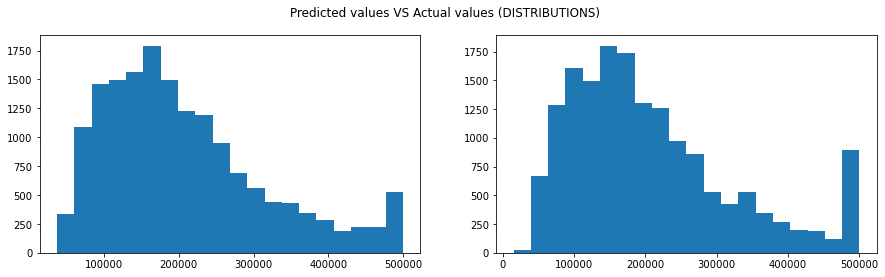

In [138]:
fig,(axe1, axe2) = plt.subplots(1, 2)
fig.set_figwidth(15)
fig.suptitle('Predicted values VS Actual values (DISTRIBUTIONS)')
axe1.hist(pd.Series(predict_values), bins=20);
axe2.hist(housing_labels, bins=20);

* TESTING MODEL WITH TEST SET

In [139]:
X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value']

In [140]:
X_test_prepared = combine_transformation.transform(X_test)

In [141]:
test_prediction = housing_model.predict(X_test_prepared)
mse_test = mean_squared_error(test_prediction, y_test.values)
rmse_test = np.round(np.sqrt(mse_test), 2)
rmse_test

68699.52

In [142]:
housing_model.score(X_test_prepared, y_test)

0.6378335437589928

In [143]:
### FURTHER ANALYISIS REQUIRED FOR LOW RMSE SCORES ON TEST SET